# TS4: Primeras nociones de estimación espectral
### Autoras: Noelia Ferrari y Angelina Fantauzzo Fabio

**Consigna**: 
Considere 200 realizaciones (muestras tomadas de 𝑓𝑟) de 1000 muestras para cada experimento.
Parametrice para SNR's de 3 y 10 db (Ayuda: calibre 𝑎1
 para que la potencia de la senoidal sea 1 W).
Se pide:

Realizar una tabla por cada SNR, que describa el sesgo y la varianza de cada estimador para cada ventana analizada. Recuerde incluir las ventanas rectangular (sin ventana), flattop y blackmanharris y otras que considere. 


## Introducciones teóricas

En el análisis y procesamiento de señales, un problema es la estimación de parámetros de una señal senoidal con ruido, en particular su amplitud y su frecuencia.
La señal de interés puede modelarse como:
$$
x(k) = a_{0} \cdot \sin(\Omega_{1} \cdot n) + n_{a}(n)
$$

$$
a_{0} = 2
$$

$$
\Omega_{1} = \Omega_{0} + f_{r} \cdot \frac{2\pi}{N}
$$

$$
\Omega_{0} = \frac{\pi}{2}
$$

donde:
- a0es la amplitud de la senoidal.


- Ω1 es la frecuencia angular de la señal, afectada por un pequeño corrimiento aleatorio.


- na(n) es un ruido aditivo gaussiano blanco (AWGN) con media cero y varianza σ^2.

### SNR
El SNR es la relacion señal con ruido, mide qué tan fuerte es la señal respecto al ruido que la acompaña. 

La relación se define como:

$$
\text{SNR (dB)} = 10 \log_{10} \frac{P_\text{señal}}{P_\text{ruido}}
$$

Para una señal senoidal:

$$
x(t) = A \sin(2\pi f t), \quad P_\text{señal} = \frac{A^2}{2}
$$

Dado un SNR deseado, en este caso 3db o 10db, la potencia del ruido se calcula como:

$$
P_\text{ruido} = \frac{P_\text{señal}}{10^{\text{SNR}/10}}
$$

Y el desvío estándar del ruido gaussiano es:

$$
\sigma_\text{ruido} = \sqrt{P_\text{ruido}}
$$

Finalmente, la señal con ruido es:

$$
S = x(t) + R, \quad R \sim \mathcal{N}(0, \sigma_\text{ruido}^2)
$$



### Estimadores
Para simular un entorno realista se introducen dos fuentes de aleatoriedad:
- Un desplazamiento aleatorio en la frecuencia, modelado por una distribución uniforme.


- La presencia de ruido blanco gaussiano, que representa interferencias.


La relación entre la potencia de la señal y la del ruido se controla mediante la relación señal a ruido (SNR), fundamental para evaluar el rendimiento de los estimadores.

El objetivo es estimar los parámetros a0​ y Ω1​ a partir de muestras ruidosas. Para ello se emplean estimadores basados en la Transformada Discreta de Fourier (DFT) aplicada sobre la señal multiplicada por una ventana w(n).

Un estimador es una regla o algoritmo que utiliza datos muestrales para aproximar un parámetro que desconocemos.

**Estimador de amplitud**
$$
\hat{a}_{1}^{\,i} = \left| X_{w}^{i}(\Omega_{0}) \right| 
= \left| \mathcal{F}\{ x(n) \cdot w_{i}(n) \} \right|
$$

**Estimador de frecuencia**
$$
\hat{\Omega}_{1}^{\,i} = \arg\max_{f} \left\{ \left| X_{w}^{i}(\Omega) \right| \right\}
$$

*Observacion*

Al calcular un estimador de frecuencia a partir de la Transformada de Fourier Discreta (DFT), es importante considerar la simetría del espectro para señales reales.  

Debido a que la DFT cumple:

$$
X[k] = X^{*}[N-k],
$$

el espectro presenta dos máximos: uno en la frecuencia positiva y otro en la negativa.  

Por esta razón, al diseñar el estimador de frecuencia

$$
\hat{a} = \arg \max_{k} |X[k]|
$$

debe limitarse la búsqueda al rango

$$
k = 0, 1, \dots, \frac{N}{2},
$$

que corresponde a las frecuencias positivas \([0, f_s/2]\).  

De esta forma se evita contar dos veces la misma información y se obtiene una estimación consistente de la frecuencia real de la señal.





**Sesgo**: diferencia entre el valor esperado del estimador y el valor real del parámetro.

$$
s_{a} = \hat{\mu}_{a} - a_{0}
$$


**Varianza**: dispersión de las estimaciones respecto a su valor esperado.


$$
\nu_{a} = \frac{1}{M} \sum_{j=0}^{M-1} \left( \hat{a}_{j} - \hat{\mu}_{a} \right)^{2}
$$

$$
\nu_{a} = \operatorname{var}\{\hat{a}_{0}\} 
= E\left\{ \left( \hat{a}_{0} - E\{\hat{a}_{0}\} \right)^{2} \right\}
$$


En la práctica se generan múltiples realizaciones de la señal (en este trabajo se emplean 200). Así, se obtiene una medida experimental del sesgo y la varianza para cada combinación de ventana y condición de SNR (3 dB y 10 dB).

### Ventanas
En la práctica, la DFT se aplica a un número finito de muestras, lo cual equivale a multiplicar la señal por una ventana temporal w(n). Esto produce un efecto de convolución espectral, afectando la estimación.
Dependiendo de la ventana utilizada, se presentan diferentes compromisos entre:
Resolución espectral: capacidad de separar frecuencias cercanas.
Fugas espectrales (spectral leakage): dispersión de la energía de un tono en bins vecinos.
Exactitud en la estimación de amplitud.


Las ventanas analizadas son:
- Rectangular: máxima resolución, pero alta fuga espectral.
- Flattop: diseñada para mejorar la estimación de amplitud, sacrificando resolución.
- Blackman-Harris: reduce significativamente la fuga, aunque ensancha el lóbulo principal.
- Gaussiana: ventana flexible, ajustable mediante un parámetro de dispersión.


# Desarollo del codigo 

**Librerias**

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.fft import fft
from scipy.signal import windows
from numpy.fft import fftfreq

**Funciones**

In [6]:
def eje_temporal(N,fs):
    Ts = 1/fs
    t_final = N*Ts
    tt= np.arange(0,t_final,Ts)
    return tt

def seno(tt,frec,amp,fase = 0, v_medio=0):
    xx = amp*np.sin(2*np.pi*frec*tt + fase) + v_medio
    return xx

**Parametros**

In [7]:
SNR = 10 #SNR es db
amp_0= np.sqrt(2) #en Volts
N = 1000
fs = N # en Hertz
deltaf = fs/N # En Hertz, resolucion espectral.
mu = 0
realizaciones = 200  

fr = np.random.uniform(-2,2,size=realizaciones)*deltaf #Estas son nuestras frecuencias aleatornias, es uns distribucion normal
tt = eje_temporal(N = N, fs=fs).flatten()

tt = tt.reshape((-1,1))
fr = fr.reshape((1,-1))

w0 = N/4
w1 = 2*np.pi*((w0 + fr) * deltaf)

**Matrices**

In [11]:
#Matriz tiempo
TT = np.tile(tt, (1,realizaciones))

#Matriz frecuencias randoms
FF = np.tile(fr, (N,1))

#Ruido
potencia_ruido = amp_0**2/(2*10**(SNR/10)) #esta seria la varianza tmb
print("Potencia/Varianza de ruido:", potencia_ruido)
desvio_estandar = np.sqrt(potencia_ruido)

#Ruido
R = np.random.normal(loc = 0, scale = desvio_estandar, size = (N,realizaciones))
varianza_ruido = np.var(R)
print("Potencia/Varianza de ruido:", varianza_ruido)

#Matriz de señales con ruido
S = amp_0*np.sin(w1*TT) + R

#Notar que las varizanas son casi iguales calculadas de diferentes maneras.

Potencia/Varianza de ruido: 0.10000000000000002
Potencia/Varianza de ruido: 0.09984431334934112


**Ventanas**

In [12]:
rect = np.ones((N,1))
flattop = windows.flattop(N).reshape(N,1)
blackmanharris = windows.blackmanharris(N).reshape(N,1)
blackman = windows.blackman(N).reshape(N,1)

**Ventaneo y transformo FFT**

In [13]:
#Venataneo la matriz S (señal de senos con ruido) con las diferentes ventanas
S_rect = S*rect
S_ventaneada_flattop = S*flattop
S_ventaneada_blackmanharris = S*blackmanharris
S_ventaneada_blackman = S*blackman

#Transformo FFT y escalo por 1/N
S_fft = fft(S_rect, axis=0)*(1/N)
S_flattop_fft = fft(S_ventaneada_flattop, axis=0)*(1/N)
S_blackmanharris_fft = fft(S_ventaneada_blackmanharris, axis=0)*(1/N)
S_blackman_fft = fft(S_ventaneada_blackman, axis=0)*(1/N)

**Estimadores de amplitud**

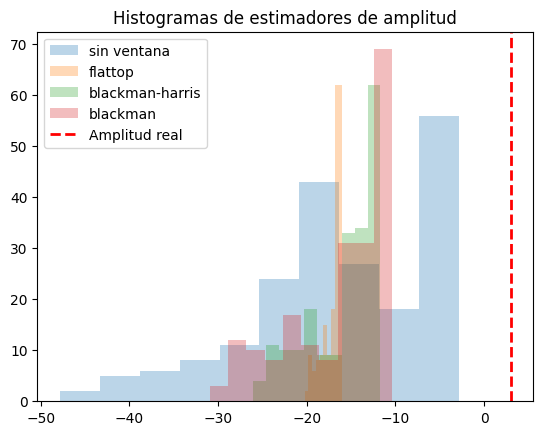

In [23]:
#Genero los estimadores de amplitud a mitad de banda digital 
a0 = np.abs(S_fft[N//4, :])
a1 = np.abs(S_flattop_fft[N//4, :])
a2 = np.abs(S_blackmanharris_fft[N//4, :])
a3 = np.abs(S_blackman_fft[N//4, :])

#Los paso a dB
a0_db = 20*np.log10(a0)
a1_db = 20*np.log10(a1)
a2_db = 20*np.log10(a2)
a3_db = 20*np.log10(a3)

amp_real = amp_0
amp_real_db = 20*np.log10(amp_real)

#Grafico los histogramas de aplitud
plt.figure()
plt.hist(a0_db, bins=10, alpha=0.3, label="sin ventana")
plt.hist(a1_db, bins=10, alpha=0.3, label="flattop")
plt.hist(a2_db, bins=10, alpha=0.3, label="blackman-harris")
plt.hist(a3_db, bins=10, alpha=0.3, label="blackman")
plt.axvline(amp_real_db, color='r', linestyle='--', linewidth=2, label="Amplitud real")
plt.legend()
plt.title("Histogramas de estimadores de amplitud")
plt.show()


**Estimadores de frecuencias**

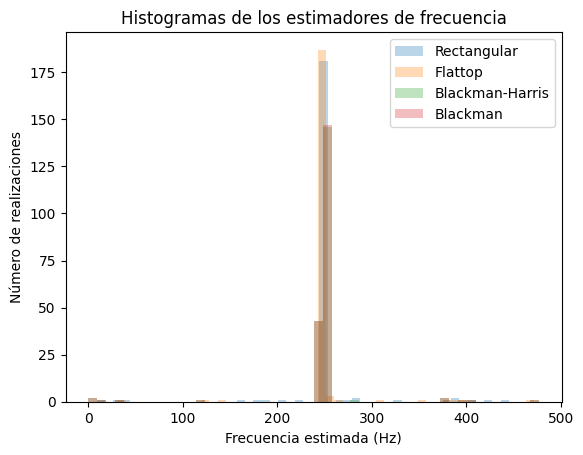

In [22]:
#de 0 a fs/2 porque despues de fs/2 hay simetria y si no lo reduzco va a encontrar dos picos y no quiero eso
f1 = np.abs(np.argmax(S_fft[:N//2, :], axis=0))
f2 = np.abs(np.argmax(S_flattop_fft[:N//2, :], axis=0))
f3 = np.abs(np.argmax(S_blackmanharris_fft[:N//2, :], axis=0))
f4 = np.abs(np.argmax(S_blackman_fft[:N//2, :], axis=0))

# eje de frecuencias (Hz)
freqs = np.fft.fftfreq(N, d=1/fs)  # vector de frecuencias entre -fs/2 y fs/2
freqs_pos = freqs[:N//2]

# Los paso a  Hz
f1_hz = freqs_pos[f1]
f2_hz = freqs_pos[f2]
f3_hz = freqs_pos[f3]
f4_hz = freqs_pos[f4]
#Grafico los histogramas de frecuencias
plt.figure()
plt.hist(f1_hz, bins=50, alpha=0.3, label="Rectangular")
plt.hist(f2_hz, bins=50, alpha=0.3, label="Flattop")
plt.hist(f3_hz, bins=50, alpha=0.3, label="Blackman-Harris")
plt.hist(f4_hz, bins=50, alpha=0.3, label="Blackman")
plt.xlabel("Frecuencia estimada (Hz)")
plt.ylabel("Número de realizaciones")
plt.title("Histogramas de los estimadores de frecuencia")
plt.legend()
plt.show()

**Tablas**

In [33]:
#esperanza
mu_a0 = np.mean(a0) 
mu_a1 = np.mean(a1)
mu_a2 = np.mean(a2)
mu_a3 = np.mean(a3)

# sesgo
sesgo_a0 = mu_a0 - amp_real
sesgo_a1 = mu_a1 - amp_real
sesgo_a2 = mu_a2 - amp_real
sesgo_a3 = mu_a3 - amp_real

#varianza
var_a0 = np.var(a0, ddof=1)  
var_a1 = np.var(a1, ddof=1)
var_a2 = np.var(a2, ddof=1)
var_a3 = np.var(a3, ddof=1)


f_real = ((w0 + fr.flatten()) * deltaf) 

#esperanza
mu_f1 = np.mean(f1_hz)
mu_f2 = np.mean(f2_hz)
mu_f3 = np.mean(f3_hz)
mu_f4 = np.mean(f4_hz)

# sesgo
sesgo_f1 = mu_f1 - f_real.mean()  # le calculo la media al valor real xq es un vector 
sesgo_f2 = mu_f2 - f_real.mean()
sesgo_f3 = mu_f3 - f_real.mean()
sesgo_f4 = mu_f4 - f_real.mean()

#varianza
var_f1 = np.var(f1_hz)
var_f2 = np.var(f2_hz)
var_f3 = np.var(f3_hz)
var_f4 = np.var(f4_hz)

#Datos de amplitud
ventanas = ["Rectangular", "Flattop", "Blackman-Harris", "Blackman"]
sesgos_amp = [sesgo_a0, sesgo_a1, sesgo_a2, sesgo_a3]
varianzas_amp = [var_a0, var_a1, var_a2, var_a3]

#Datos de frecuencia
sesgos_frec = [sesgo_f1, sesgo_f2, sesgo_f3, sesgo_f4]
varianzas_frec = [var_f1, var_f2, var_f3, var_f4]

#Tabla amplitud
print("Tabla estimadores de amplitud (SNR=10 dB)")
print(f"{'Ventana':<15} {'Sesgo (V)':<15} {'Varianza (V^2)':<15}")
for v, s, var in zip(ventanas, sesgos_amp, varianzas_amp):
    print(f"{v:<15} {s:<15.6f} {var:<15.6f}")
    
#Tabla frecuencia
print("\nTabla estimadores de frecuencia (SNR=10 dB)")
print(f"{'Ventana':<15} {'Sesgo (Hz)':<15} {'Varianza (Hz^2)':<15}")
for v, s, var in zip(ventanas, sesgos_frec, varianzas_frec):
    print(f"{v:<15} {s:<15.6f} {var:<15.6f}")


Tabla estimadores de amplitud (SNR=10 dB)
Ventana         Sesgo (V)       Varianza (V^2) 
Rectangular     -1.145156       0.057281       
Flattop         -1.273474       0.000226       
Blackman-Harris -1.241363       0.004194       
Blackman        -1.231754       0.007745       

Tabla estimadores de frecuencia (SNR=10 dB)
Ventana         Sesgo (Hz)      Varianza (Hz^2)
Rectangular     0.355411        1624.074775    
Flattop         1.440411        987.247500     
Blackman-Harris -1.759589       1861.307500    
Blackman        -1.884589       1844.454375    


# Conclusiones

Probamos el codigo con SNR de 3db y de 10db y llegamos a la conclusion de que a SNR mas alto los estimadores son más precisos y histogramas mas estrechos, se vio claramente en el de frecuencia. En cambio, a SNR bajo los estimadores fueron más dispersos y por lo tanto los histogramas más amplios. 

Por otro lado, en el gráfico del histograma de estimadores de amplitud se observa claramente que la ventana flattop es la que presenta menor dispersión de datos (menor varianza), aunque a su vez muestra un mayor sesgo. En cambio, la ventana rectangular presenta la mayor varianza, pero con el beneficio de un sesgo más reducido. Si lo que queremos es medir con presición la amplitud de los picos elegiría la ventana flattop aunque sesge un poco